# Class-Project - Media Sentiment and Voting Outcomes

## Topic: Anaylzing Swiss Media Coverage and its Relation to Direct Democratic Decisions

**Description:**  
This project explores how Swiss media coverage—through sentiment and topic analysis—relates to the outcomes of national referenda. Using a dataset of approximately 100–120 newspaper articles covering 20 popular initiatives, we apply Natural Language Processing (NLP) techniques to uncover prevailing themes and emotional tone in the media discourse. The results are then compared to the respective voting outcomes to investigate whether patterns of alignment or divergence emerge between public sentiment and media framing.

*Note: This is an exploratory project and does not aim to establish causal relationships.*

---

## 1. Data Retrieval and Management

Before starting the analysis, we install and import all necessary Python libraries for text preprocessing, sentiment analysis, topic modeling, and visualization.

In [32]:
# install required packages (pandas, requests, beautifulsoup4, tqdm) if not already installed
# import
import pandas as pd
import re
import requests
from bs4 import BeautifulSoup
from tqdm import tqdm


In [ ]:
# load data
input_path = "Data_ML.xlsx" 
df = pd.read_excel(input_path)

In [ ]:
# inspect data
df.head()

,vote_id,id,voting_date,initiative,yes_share,result,news_article_URL,publication_date,newspaper_name,text
0,1,1,2011-02-13,Für den Schutz vor Waffengewalt,0.437,Abgelehnt,https://www.20min.ch/story/tell-srebrenica-und...,2011-01-09,20min,NaN
1,1,2,2011-02-13,Für den Schutz vor Waffengewalt,0.437,Abgelehnt,https://www.20min.ch/story/abstimmung-mit-prom...,2011-02-08,20min,NaN
2,1,3,2011-02-13,Für den Schutz vor Waffengewalt,0.437,Abgelehnt,https://www.20min.ch/story/daempfer-fuer-schut...,2011-01-04,20min,NaN
3,1,4,2011-02-13,Für den Schutz vor Waffengewalt,0.437,Abgelehnt,https://www.20min.ch/story/kommission-lehnt-wa...,2011-01-04,20min,NaN
4,1,5,2011-02-13,Für den Schutz vor Waffengewalt,0.437,Abgelehnt,https://www.20min.ch/story/waffenlobby-wittert...,2011-01-13,20min,NaN


Based on a comprehensive list of Swiss national initiatives, we randomly selected 20 initiatives from the past 20 years, covering nearly 80% of total initiatives in this time span. Using AI-assisted search, we identified relevant news articles from three major Swiss news outlets: SRF, NZZ, and 20 Minuten, all published **prior to the respective votes**. Since NZZ requires a login to access full articles, automated scraping was not feasible in that case, and those texts were therefore added manually.

In the following section, we define a function to automatically scrape the article texts from the remaining two outlets – SRF and 20 Minuten – using their publicly available URLs.


In [ ]:
# Function to scrape URL and extract text
def extract_text_from_url(url):
    try:
        headers = {
            "User-Agent": "Mozilla/5.0"
        }
        response = requests.get(url, headers=headers, timeout=10)
        if response.status_code != 200:
            return None
        soup = BeautifulSoup(response.content, "html.parser")
        paragraphs = soup.find_all("p")
        text = " ".join(p.get_text().strip() for p in paragraphs)
        return text if text else None
    except Exception as e:
        print(f"Fehler bei URL: {url} → {e}")
        return None

# === 3. Filter: Nur Artikel ohne NZZ, mit gültiger URL, und leerem Text ===
df_scrape = df[
    (~df["newspaper_name"].str.lower().str.contains("nzz", na=False)) &
    (~df["news_article_URL"].isnull()) &
    (df["text"].isnull() | (df["text"].str.strip() == ""))
]

# === 4. Scraping starten und in bestehende 'text'-Spalte einfügen ===
for idx in tqdm(df_scrape.index):
    url = df.at[idx, "news_article_URL"]
    text = extract_text_from_url(url)
    df.at[idx, "text"] = text

# === 5. Neue Excel-Datei speichern (im gleichen Ordner) ===
output_path = "Data_ML_filled.xlsx"
df.to_excel(output_path, index=False)
print(f"✅ Fertig! Gespeichert als: {output_path}")





100%|██████████| 76/76 [00:33<00:00,  2.28it/s]

✅ Fertig! Gespeichert als: Data_ML_filled.xlsx


Load the new dataset for following analysis and inspect the texts to find re-occuring wording and phrases not related to the article

In [ ]:
# load new data
input_path = "Data_ML_filled.xlsx" 
df_new = pd.read_excel(input_path)


In [17]:
# show 5 random articles with text longer than 50 characters
df_sample = df[df["text"].notnull() & (df["text"].str.len() > 50)].sample(5, random_state=1)

# print the sample articles
pd.set_option('display.max_colwidth', None)
df_sample[["newspaper_name", "news_article_URL", "text"]]

newspaper_name  \
104          20min   
94           20min   
96             srf   
93             nzz   
105          20min   

                                                                                                                              news_article_URL  \
104                                https://www.20min.ch/story/abstimmung-darum-warnt-der-bundesrat-vor-der-biodiversitaetsinitiative-103171217   
94                                                   https://www.20min.ch/story/13-ahv-rente-linke-eroeffnen-den-abstimmungskampf-557637387047   
96   https://www.srf.ch/sendungen/kassensturz-espresso/kassensturz/abstimmung-am-3-maerz-2024-die-13-ahv-rente-sorgt-fuer-hitzige-diskussionen   
93                                         https://www.nzz.ch/schweiz/13-ahv-rente-die-linke-mobilisiert-gezielt-frauen-fuer-ein-ja-ld.1814584   
105                    https://www.20min.ch/story/chunsch-drus-darum-gehts-deshalb-spaltet-die-biodiversitaets-abstimmung-die-bauern-103167786   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

Upon closer inspection of the raw article texts, we identified systematic non-content elements in both SRF and 20 Minuten articles. These include login instructions, app banners, author lines, and embedded lists of unrelated games or features that frequently appear at the beginning or end of the articles. As these components are not part of the actual journalistic content, we exclude them from the dataset in the following step using tailored cleaning functions for each news outlet.


In [43]:
# Clean SRF articles by removing known junk phrases and footer blocks
def clean_srf_text(text):
    if not isinstance(text, str):
        return text

    # 1. Remove known static junk phrases
    garbage_phrases = [
        "Einige Elemente auf SRF.ch funktionieren nur mit aktiviertem JavaScript",
        "SRF News App Bei Google Play",
        "In der App öffnen"
    ]
    for phrase in garbage_phrases:
        if phrase in text:
            text = text.replace(phrase, "")

    # 2. Remove dynamic noisy patterns (author info, footer, etc.)
    text = re.sub(r"Autor:\s*\n?.*?\d{2}\.\d{2}\.\d{4}, \d{2}:\d{2}", "", text)
    text = re.sub(r"Für die Registrierung benötigen wir.*", "", text)
    text = re.sub(r"Bitte melden Sie sich an, um einen Kommentar zu erfassen.*", "", text)

    return text.strip()


# Apply SRF cleaning to all SRF articles
mask_srf = df_new["newspaper_name"].str.lower().str.contains("srf", na=False)
df_new.loc[mask_srf, "text"] = df_new.loc[mask_srf, "text"].apply(clean_srf_text)


# Clean 20min articles by removing game lists and footer elements
def clean_20min_text(text):
    if not isinstance(text, str):
        return text
    
    garbage_words_20min = [
    "Deine Meinung zählt", "Solitaire", "Kreuzworträtsel", "Sudoku", "Mahjong", "Bubbles",
    "Snake", "Schach", "eXchange", "Power of 2", "Doppel", "Cuboro", "Riddles", "Wortblitz",
    "SudoKen", "Street", "Fibonacci", "Gumblast", "Rushtower", "Skiracer", "Wimmlbid", "(sda)"
]
    
    for phrase in garbage_words_20min:
        text = text.replace(phrase, "")

    return text.strip()

# Apply 20min cleaning to all 20 Minuten articles
mask_20min = df_new["newspaper_name"].str.lower().str.contains("20", na=False)
df_new.loc[mask_20min, "text"] = df_new.loc[mask_20min, "text"].apply(clean_20min_text)





Print random articles form 20min and SRF to insepct if there are still some remaining non-content elements.

In [45]:
pd.set_option('display.max_colwidth', None)  # show full text content

# Show 5 random cleaned SRF and 5 random 20min articles
sample_srf = df_new[mask_srf & df_new["text"].notnull() & (df_new["text"].str.len() > 100)].sample(5, random_state=1)
sample_20min = df_new[mask_20min & df_new["text"].notnull() & (df_new["text"].str.len() > 100)].sample(5, random_state=2)

display(sample_srf[["newspaper_name", "news_article_URL", "text"]])
display(sample_20min[["newspaper_name", "news_article_URL", "text"]])

newspaper_name  \
14            srf   
83            srf   
15            srf   
66            srf   
79            srf   

                                                                                                   news_article_URL  \
14  https://www.srf.ch/news/schweiz/masseneinwanderungs-initiative-die-auslaender-kommen-die-schweiz-unter-zugzwang   
83               https://www.srf.ch/radio-srf-1/abstimmung-am-13-februar-tierversuchsverbotsinitiative-ja-oder-nein   
15   https://www.srf.ch/news/schweiz/paedophilen-initiative-paedophile-sollen-nie-mehr-mit-kindern-arbeiten-duerfen   
66                  https://www.srf.ch/news/abstimmung-von-26-september-99-prozent-initiative-spaltet-die-meinungen   
79                  https://www.srf.ch/radio-srf-1/justizinitiative-richterwahl-im-losverfahren-die-bessere-loesung   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

newspaper_name  \
42          20min   
43          20min   
88          20min   
30          20min   
94          20min   

                                                                                                    news_article_URL  \
42                              https://www.20min.ch/story/bundesrat-lehnt-die-begrenzungsinitiative-ab-983134565504   
43                     https://www.20min.ch/story/was-geschieht-wenn-die-svp-initiative-angenommen-wird-433791918637   
88  https://www.20min.ch/story/das-musst-du-zur-initiative-fuer-ein-verbot-der-massentierhaltung-wissen-177410670324   
30                           https://www.20min.ch/story/der-bestatter-greift-in-die-billag-schlacht-ein-191657448417   
94                         https://www.20min.ch/story/13-ahv-rente-linke-eroeffnen-den-abstimmungskampf-557637387047   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [41]:
## download the file to manually inspect:
df_new.to_excel("Data_ML_bereinigt.xlsx", index=False)

## 2. Descriptive Analysis and Visualizations

This section provides an overview of the cleaned dataset and explores basic structural properties of the collected newspaper articles. While descriptive statistics are often used to identify first empirical patterns or directional effects, this task is less straightforward in natural language data. In textual analysis, descriptive steps typically serve to better understand the composition and structure of the data — for example, article distribution across sources and topics, variation in text length, or the frequency of certain keywords.

In the context of our project, we investigate whether newspaper coverage reflects political sentiment or voter preferences in the run-up to Swiss national votes. The dataset consists of approximately 120 articles related to 20 federal initiatives, making it relatively small and unevenly distributed across media outlets. These limitations must be kept in mind when interpreting patterns.

Nonetheless, this section aims to characterize the dataset in a meaningful way. We visualize article distributions, compare structural features (e.g., text length), and explore word frequencies to uncover initial content-related differences between media sources or accepted vs. rejected initiatives.

### 2.1 Distribution of Articles by News Outlet

The following bar chart shows how many articles in the dataset originate from each news outlet. This helps assess the balance of sources and identify any potential dominance by a single media platform.

C:\Users\valen\AppData\Local\Temp\ipykernel_2256\3286600706.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


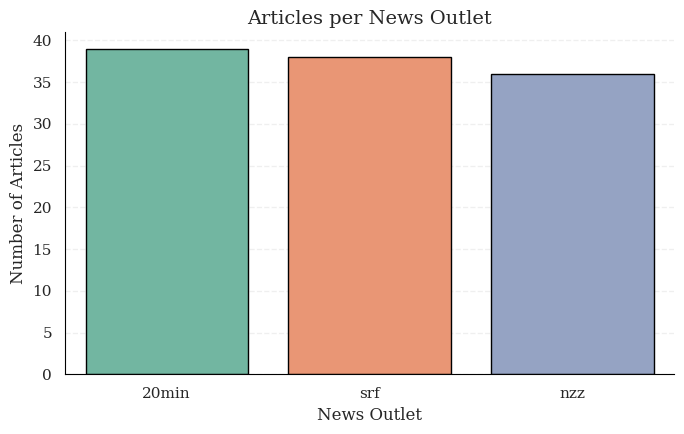

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count number of articles per newspaper
article_counts = df_new["newspaper_name"].value_counts()

# Plot
sns.set_theme(style="whitegrid", context="notebook", font="serif")
plt.rcParams.update({
    "axes.edgecolor": "black",
    "axes.linewidth": 0.8,
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11,
    "font.family": "serif",
})

# Example barplot
plt.figure(figsize=(7, 4.5))
sns.barplot(
    x=article_counts.index,
    y=article_counts.values,
    palette="Set2",
    edgecolor="black"
)

plt.xlabel("News Outlet")
plt.ylabel("Number of Articles")
plt.title("Articles per News Outlet")
plt.grid(axis="y", linestyle="--", alpha=0.3)
sns.despine()
plt.tight_layout()
plt.show()

**Interpretation**

The dataset includes a relatively balanced number of articles from all three major Swiss news outlets under consideration. 20 Minuten and SRF each contribute close to 40 articles, while NZZ is slightly less represented with around 36 articles. This distribution suggests that no single outlet dominates the dataset, which is beneficial for a more unbiased analysis of media content.


### 2.2 Distribution of Article Lengths

To better understand the informational content of the articles, we examine their length as measured by the number of characters. This helps assess whether certain media outlets tend to publish longer or more concise texts. While article length alone does not imply depth or quality, it can be a useful proxy for content richness.

The following histogram shows the distribution of article lengths across all sources.


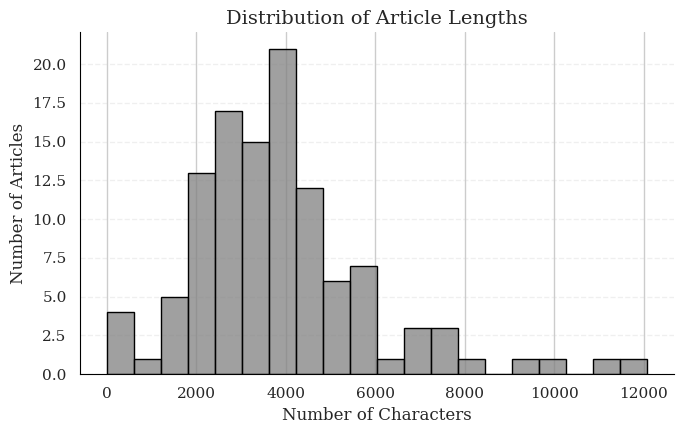

C:\Users\valen\AppData\Local\Temp\ipykernel_2256\2320751475.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_new, x="newspaper_name", y="text_length", palette="Set2")


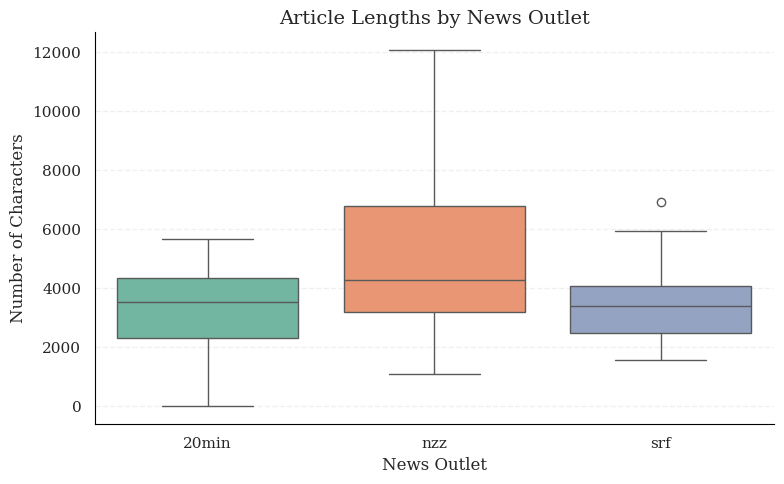

In [53]:
# Neue Spalte mit Textlängen erstellen
df_new["text_length"] = df_new["text"].apply(lambda x: len(x) if isinstance(x, str) else 0)

# Plot
plt.figure(figsize=(7, 4.5))
sns.histplot(data=df_new, x="text_length", bins=20, kde=False, color="gray", edgecolor="black")

plt.title("Distribution of Article Lengths")
plt.xlabel("Number of Characters")
plt.ylabel("Number of Articles")
plt.grid(axis="y", linestyle="--", alpha=0.3)
sns.despine()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(data=df_new, x="newspaper_name", y="text_length", palette="Set2")

plt.title("Article Lengths by News Outlet")
plt.xlabel("News Outlet")
plt.ylabel("Number of Characters")
plt.grid(axis="y", linestyle="--", alpha=0.3)
sns.despine()
plt.tight_layout()
plt.show()

